## **Importing Necessary Libraries**

In [54]:
import os  # For directory and file handling
import cv2  # For image processing
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import random
from IPython import display
from tqdm import tqdm #to display a progress bar, providing real-time feedback during long-running loops.


###  1. **Importing The Dataset**

In [55]:
path="C:/Users/SPPL IT/Desktop/Study/CVPR_ASSIGNMENT/CVPR/MID/Animals"  # The path where the dataset is stored, containing subdirectories for each category

def load_image(path):  # Defined a function to load the categories from the dataset path
    catagories = os.listdir(path)  # List all files in the given path
    return catagories  # Return the list of categories 


---

### **Role of the `os` Module**

The `os` module provides a way to interact with the operating system, allowing file and directory manipulation.

In this code, `os.listdir(path)` is used to list all subdirectories (categories) in the given dataset path. This helps dynamically retrieve the available categories (class labels) for the image classification task.

---

### **2. Optimized Image Data Loading and Preprocessing**

In [56]:
def get_trained_data(categories, path):  
    trained_data = []  # Initialized an empty list to store image data and labels

    for category in categories:  
        category_path = os.path.join(path, category)  # Construct the full path for the category
        for img_name in tqdm(os.listdir(category_path)):  # Loop through each image in the category folder
            img_path = os.path.join(category_path, img_name)  # Full image path
            label = categories.index(category)  # Assign the category index as the label

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
            if img is not None:  # Check if image was successfully loaded
                img = cv2.resize(img, (32, 32))  # Resize image to 32x32 pixels
                trained_data.append([img, label])  # Append the image and label to the list

    random.shuffle(trained_data)  # Shuffle the data to randomize it
    return trained_data  # Return the processed data

100%|██████████| 39/39 [00:00<00:00, 295.76it/s]


Image 1: Label 1
Image 1 shape: (32, 32)


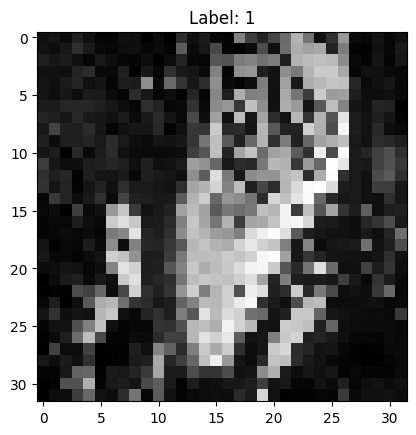

Image 2: Label 4
Image 2 shape: (32, 32)


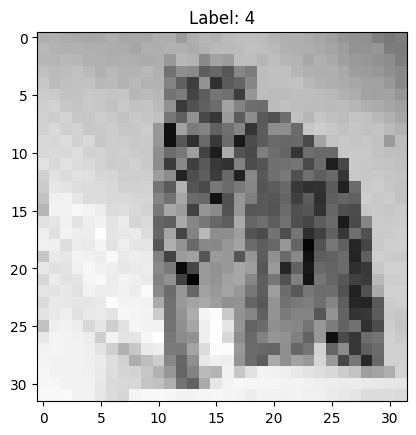

Image 3: Label 3
Image 3 shape: (32, 32)


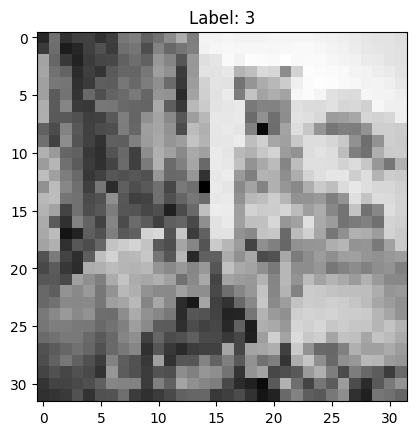

Image 4: Label 1
Image 4 shape: (32, 32)


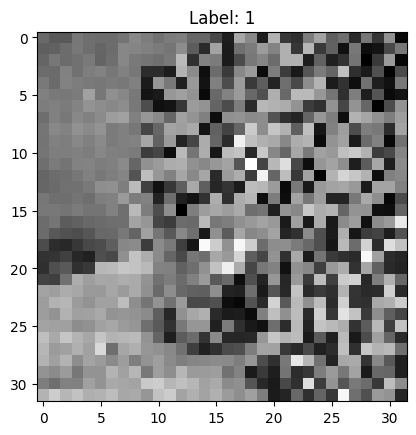

Image 5: Label 4
Image 5 shape: (32, 32)


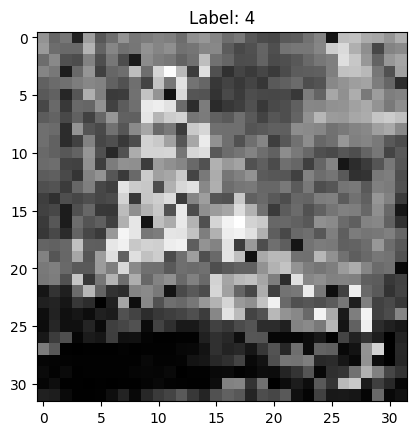

In [57]:
categories = load_image(path)
trained_data = get_trained_data(categories, path)

# Printing the first 5 images and their labels
for i in range(5):
    img, label = trained_data[i]
    print(f"Image {i+1}: Label {label}")
    print(f"Image {i+1} shape: {img.shape}")  # Print image shape
    plt.imshow(img, cmap='gray')  # Show the image in grayscale
    plt.title(f"Label: {label}")
    plt.show()  # Display the image


### **3. Using Euclidean (L2) distance to determine similarity.**

In [68]:
# Split the dataset into training (80%) and validation (20%)
split_index = int(len(trained_data) * 0.8)  # Compute split index
training_set = trained_data[:split_index]  # First 80% for training
validation_set = trained_data[split_index:]  # Remaining 20% for validation

In [ ]:
# Function to calculate Euclidean (L2) distance
def euclidean_distance(img1, img2):
    img1 = img1.flatten()  # Flatten first image
    img2 = img2.flatten()  # Flatten second image
    return np.sqrt(np.sum((img1 - img2) ** 2))  # L2 distance formula

# Function to calculate distances between validation and training images
def calculate_distances(validation_set, training_set):
    distances = []  # List to store distances
    for v in tqdm(validation_set):  # Iterate over validation images
        for t in training_set:  # Iterate over training images
            distance = euclidean_distance(v[0], t[0])  # Calculate L2 distance
            distances.append((distance, t[1], v[1]))  # Append distance and labels
    return distances

# Perform Distance Calculation
distances = calculate_distances(validation_set, training_set)

# Display first 5 calculated distances
for d in distances[:5]:
    print(f"Distance: {d[0]:.2f}, Training Label: {d[1]}, Validation Label: {d[2]}")

100%|██████████| 34/34 [00:00<00:00, 430.84it/s]

Distance: 327.50, Training Label: 1, Validation Label: 1
Distance: 324.92, Training Label: 4, Validation Label: 1
Distance: 326.47, Training Label: 3, Validation Label: 1
Distance: 328.97, Training Label: 1, Validation Label: 1
Distance: 331.50, Training Label: 4, Validation Label: 1


In [71]:
# Function to calculate Euclidean distance
def euclidean_distance(img1, img2):
    """
    Measure how different two images are.
    """
    img1 = img1.flatten()  # Convert the first image to a 1D list
    img2 = img2.flatten()  # Convert the second image to a 1D list
    return np.sqrt(np.sum((img1 - img2) ** 2))  # Distance formula


# Function to calculate distances within the entire dataset
def calculate_distances_full(data):
    """
    Compare each image with all other images in the dataset.
    """
    distances = []  # Store the distances
    for i, img1 in tqdm(enumerate(data)):  # Loop through each image
        for j, img2 in enumerate(data):  # Compare with every other image
            if i != j:  # Avoid comparing the same image with itself
                distance = euclidean_distance(img1[0], img2[0])  # Calculate distance
                distances.append((distance, img1[1], img2[1]))  # Save distance and labels
    return distances


# Calculate distances for all images in the dataset
distances = calculate_distances_full(trained_data)

# Print first 5 distances
for d in distances[:5]:
    print(f"Distance: {d[0]:.2f}, Label 1: {d[1]}, Label 2: {d[2]}")


170it [00:00, 336.98it/s]

Distance: 332.54, Label 1: 1, Label 2: 4
Distance: 332.94, Label 1: 1, Label 2: 3
Distance: 338.12, Label 1: 1, Label 2: 1
Distance: 331.48, Label 1: 1, Label 2: 4
Distance: 331.16, Label 1: 1, Label 2: 3
